In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

loading data

In [3]:
df = pd.read_csv('PatientTreatment.csv')
# a glimpse of dataset

df.head(5)

,patient,action,resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


# 1-process mining


## 1-data analysis


### a) number of unique patients



In [4]:
len(df['patient'].unique())

100

### b) action barplot

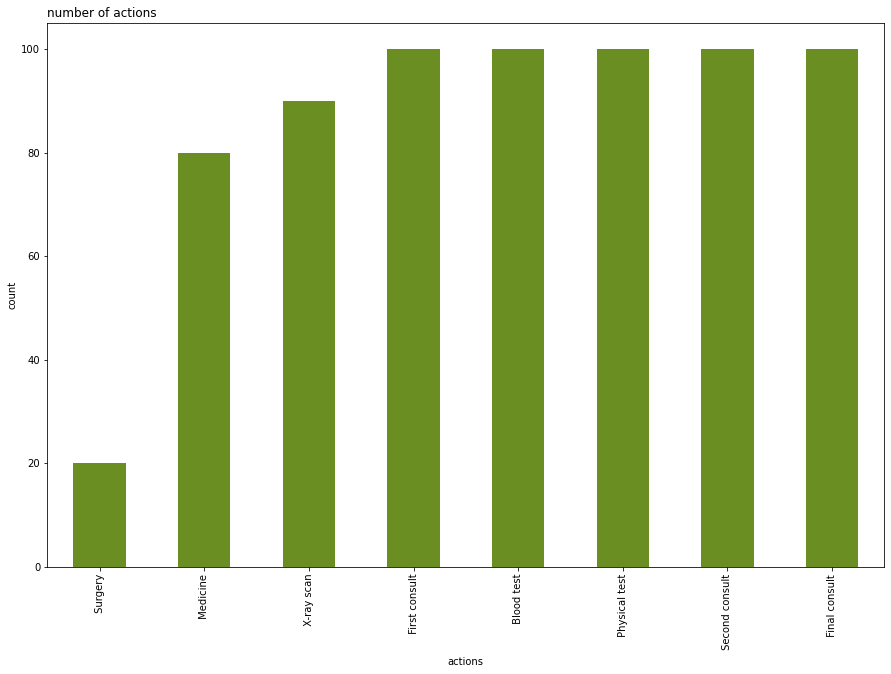

In [12]:
df["action"].value_counts(ascending=True).plot(kind="bar", figsize=(15,10), color='olivedrab')
plt.title('number of actions', loc='left')
plt.ylabel('count')
plt.xlabel('actions');

the least frequent action is surgery and the most frequent are (First consult, blood test, physical test, second consult, final consult) it's due to the fact that these kind of actions are usually being done during a regular medical checkup so it's on everey person.

### c) Resource Barplot

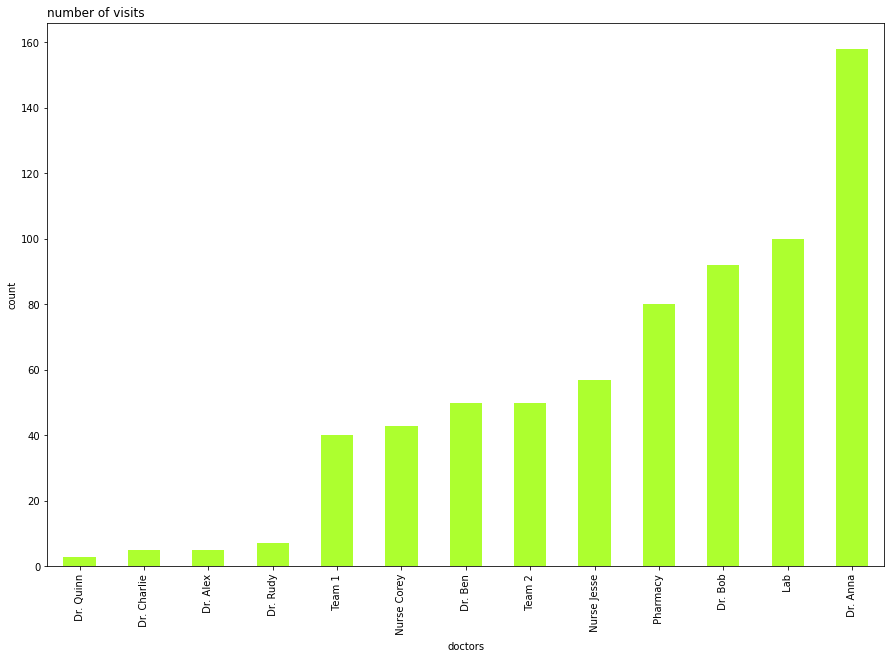

In [13]:
df["resource"].value_counts(ascending=True).plot(kind="bar", figsize=(15,10), color='greenyellow')
plt.title('number of visits', loc='left')
plt.ylabel('count')
plt.xlabel('doctors');

Dr. anna most visits
Dr. quinn least visits

## 2-resource, action, date


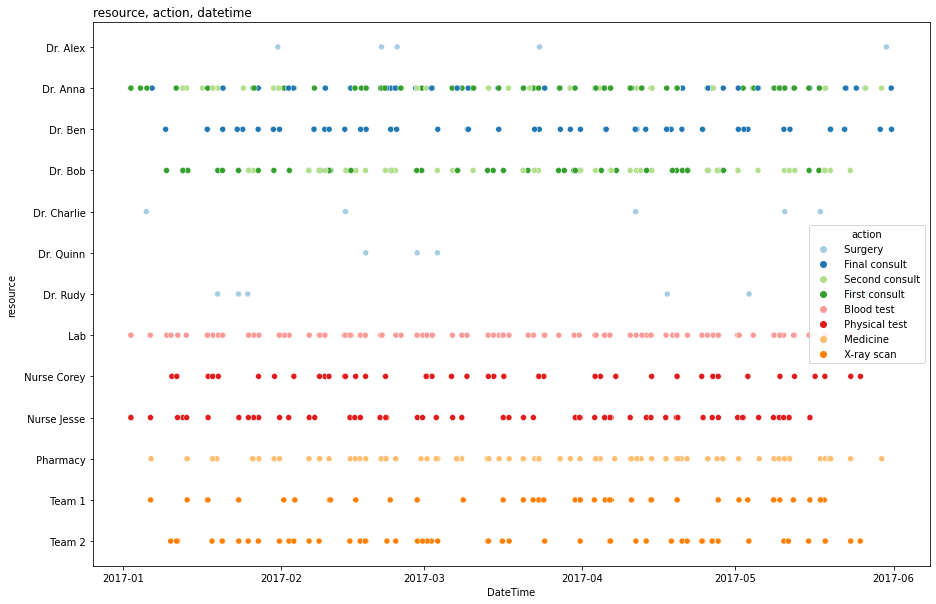

In [20]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df.sort_values("resource"), x='DateTime', y='resource', hue='action', palette="Paired")
plt.title("resource, action, datetime", loc='left')
plt.show()

the surgeries are done by only four doctors(Quinn, Charlie, Rudy, Alex) these people also have the least actions compared to other members of the team which is because they operate the surgeries. on the other hand Dr. Ben does  and Dr. Anna do all the first and second consult also Dr. Anna and Dr. Ben do the final consult too so the people that we mentioned have a more frequent actions than the ones doing surgeries. also it can be undestood that all the blood test are done by Lab. and all physical test are conducted by nurses. pharmacy does all the things related to medicine and all x-ray scans are performed by team 1 and team 2. team 2 seems to be having more visitors.

## 3-heatmap of actions on patients


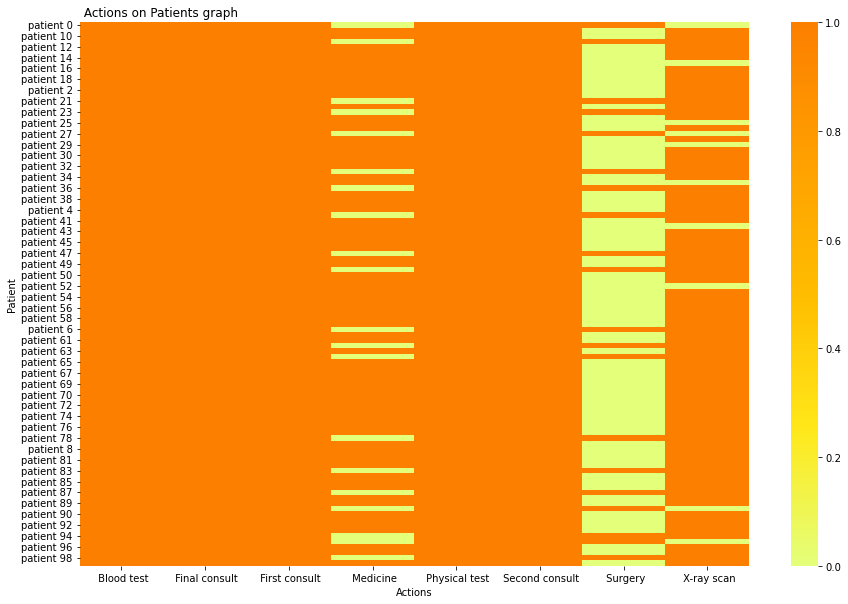

In [33]:
df_h = df[['patient', 'action', 'resource']].pivot(index=["patient"], columns=["action"])['resource']
df_h[~df_h.isna()] = 1
df_h[df_h.isna()] = 0
df_h = df_h.apply(pd.to_numeric)
plt.figure(figsize=(15, 10))
sns.heatmap(df_h, cmap="Wistia")
plt.title(" Actions on Patients graph", loc='left')
plt.xlabel("Actions")
plt.ylabel("Patient")
plt.show()

as shown above blood test, final and first and second consult and physical tests have been done for all patients due to the fact that they are part of Medical examination. less patients needed medicine and Xray and quite a hanfull of people needed to do surgery.

## 4-actions time span


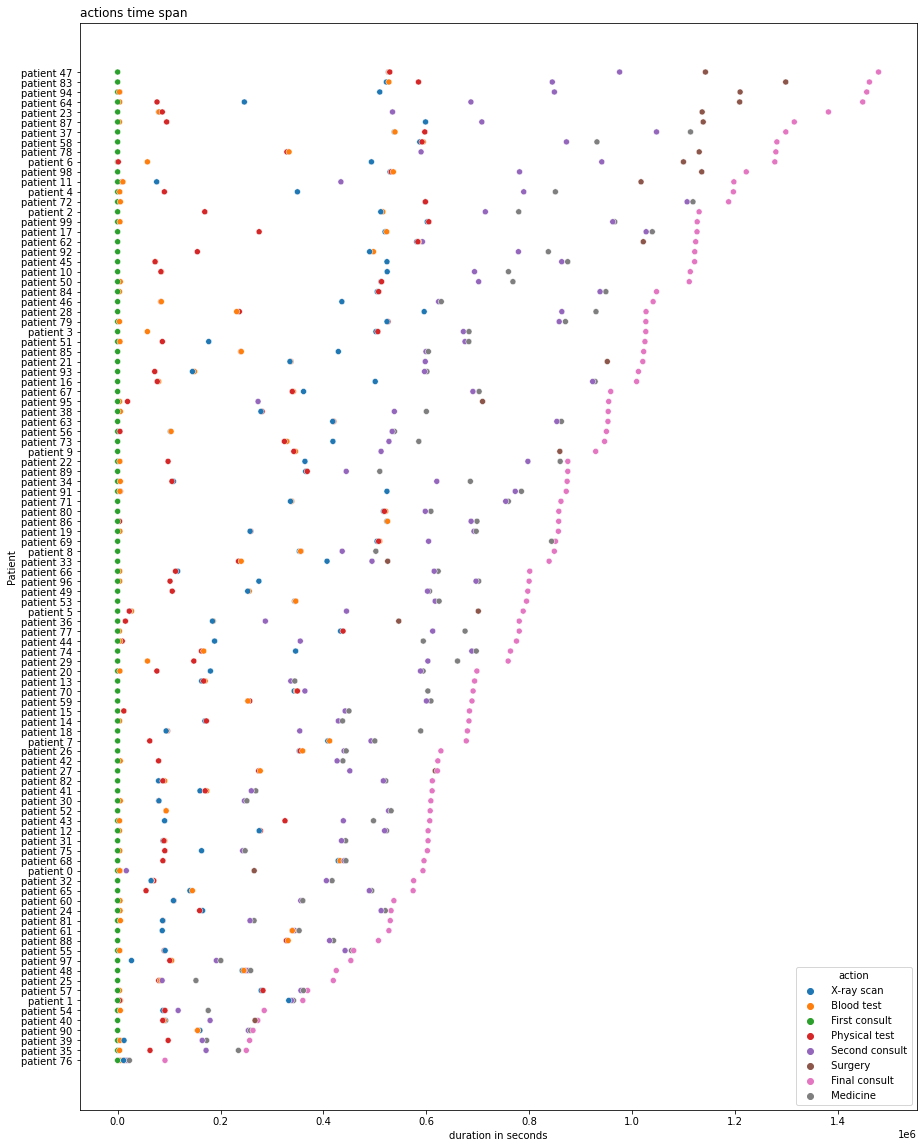

In [36]:
df["duration"] = (df["DateTime"] - df.groupby("patient")["DateTime"].transform("min")).dt.total_seconds()
df["action duration"] = df.groupby("patient")["duration"].transform("max")
plt.figure(figsize=(15,20))
sns.scatterplot(data=df.sort_values("action duration", ascending=False), x='duration', y='patient', hue='action')
plt.title("actions time span", loc='left') 
plt.xlabel("duration in seconds")
plt.ylabel("Patient")
plt.show()

first we can understand that patients that happen to be treated with surgery are going to have a larger time span in their healing process in comparison patients that use medicine have an illness time of shorter span. this recent result seems to make sense according to what we have experienced in real life.also the distance of second consult with medicine is really not that much, that indicates, if the patient is going to be treaed by medicine and doesn't need any further treatment such as surgery it is going to be obvious by the end of second consult. also patient happen to wait a long time for their final consult which is true because doctors need to make sure that patient is going to be ok.statistically saying most patients need medicine and if their health condition did not change they will probably need a surgery.

## 5-action/patient order


In [37]:
df.groupby('action').count()['patient']

action
 Blood test        100
 Final consult     100
 First consult     100
 Medicine           80
 Physical test     100
 Second consult    100
 Surgery            20
 X-ray scan         90
Name: patient, dtype: int64

Physical test,the Medical examination regularities are done for all patient (Blood test, Final consult, First consult, Physical test,Second consult) from all of them 90 seem to need x-ray scan and 80 medicine. and only a few people happened to need surgery.

## 6-time domain distribution of patients(from second consult-surgery)


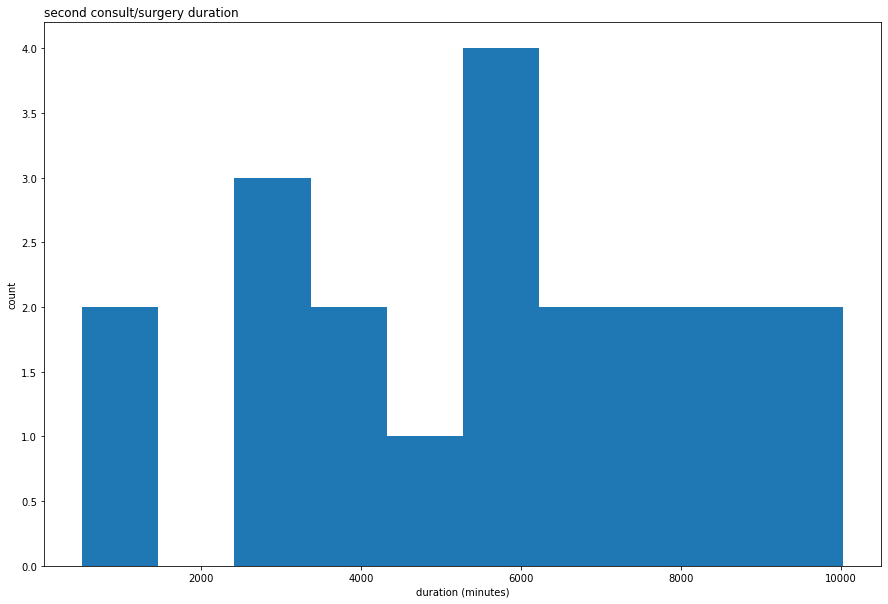

In [40]:
df_s = df[['patient', 'action', 'DateTime']].pivot(index=["patient"], columns=["action"])["DateTime"]
df_s["second consult-surgery"] = (df_s[" Surgery"] - df_s[" Second consult"]).dt.total_seconds() / 60  #in minutes
plt.figure(figsize=(15,10))
df_s["second consult-surgery"].dropna().hist()
plt. grid(False)
plt.title('second consult/surgery duration', loc='left')
plt.xlabel('duration (minutes)')
plt.ylabel('count')
plt.show()

most surgeries have been operated within a few days after(2nd consult). this gap is due to doctors buissiness or for medical perposes such as reducing mental pressure on patient.

# 2-business analytic


In [21]:
#loading data
d = pd.read_csv("transaction.csv")
d.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size
0,1,2,2950,2017-02-25,0.0,medium
1,2,3,3120,2017-05-21,1.0,large
2,3,37,402,2017-10-16,0.0,medium
3,4,88,3135,2017-08-31,0.0,medium
4,5,78,787,2017-10-01,1.0,large


## 1-Customer retention rate 

### a-monthly Customer retention rate 

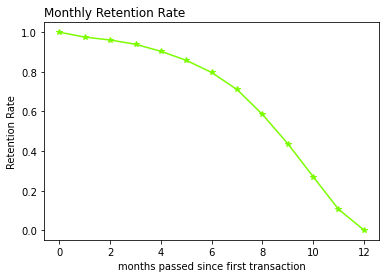

In [22]:
d['transaction_date'] = pd.to_datetime(d['transaction_date'])

retention= []

d["duration"] = d["transaction_date"] - d.groupby(["customer_id"])["transaction_date"].transform("min")
d["retention duration"] = (d["duration"].dt.total_seconds() / (30*24*60*60)) #results of months

for i in range(0, 13):
    retention.append(len(d[(d["retention duration"] >= i)]["customer_id"].unique()) / len(d["customer_id"].unique()))
    
plt.plot(retention, '-*', color='lawngreen')
plt.title('Monthly Retention Rate', loc='left')
plt.xlabel('months passed since first transaction')
plt.ylabel('Retention Rate')
plt.show()

as shown in the graph after one year the company almost have lost all the customers and it is not profitable anymore. for making his not happneded they should have noticed the loss of users way sooner like after 8 month 40% of costumers have left and the ealier they had noticed the more effective actions they could have done in order to make the graph more flat so the users keep using their product.

### b-retention and order type

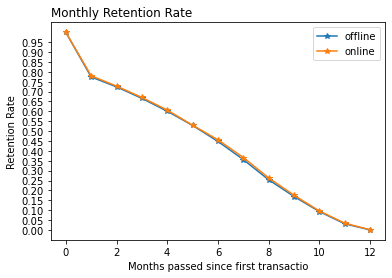

In [45]:
#using order type: online_reder
for online_order in d.dropna(subset=["online_order"])["online_order"].unique():
    d_o = d[d["online_order"] == online_order].copy() #warning if not copy
    d_o["duration"] = d_o["transaction_date"] - d_o.groupby(["customer_id"])["transaction_date"].transform("min")
    d_o["retention duration"] = (d_o["duration"].dt.total_seconds() / (30*24*60*60)) #results of months
    retention = []
    for i in range(0, 13):
        retention.append(len(d_o[(d_o["retention duration"] >= i)]["customer_id"].unique()) / len(d_o["customer_id"].unique()))
    plt.plot(retention, '-*', label="online" if online_order else "offline")
plt.legend()
plt.title("Monthly Retention Rate", loc='left')
plt.xlabel("Months passed since first transactio")
plt.ylabel("Retention Rate")
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

as shown above both online and offline are the same axcept maybe in some times online is better than offline. it is probably due to high demand on online sale of costumers because of ease of use.


### c-retention and product size

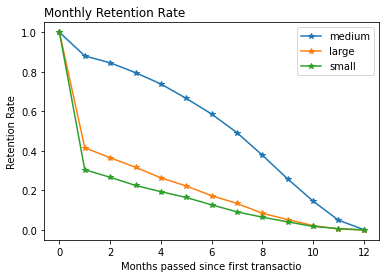

In [25]:
#using product size: small/medium/large

for product_size in d.dropna(subset=["product_size"])["product_size"].unique():
    d_s = d[d["product_size"] == product_size].copy()
    d_s["duration"] = d_s["transaction_date"] - d_s.groupby(["customer_id"])["transaction_date"].transform("min")
    d_s["retention duration"] = (d_s["duration"].dt.total_seconds() / (30*24*60*60)) #results of months
    
    retention = []
    
    for i in range(0, 13):
        retention.append(len(d_s[(d_s["retention duration"] >= i)]["customer_id"].unique()) / len(d_s["customer_id"].unique()))
    plt.plot(retention, '-*', label=product_size)
    
plt.legend()
plt.title("Monthly Retention Rate", loc='left')
plt.xlabel("Months passed since first transaction")
plt.ylabel("Retention Rate")
plt.show()

as shown, all are going down just like part-a as expected but overal in the matter of product size: medium is better than large, and large better than small.

## 2-cohort graph

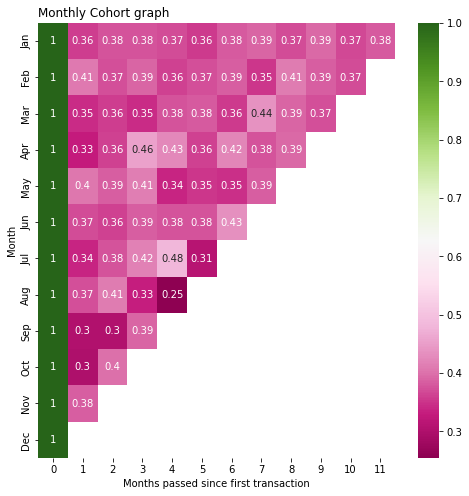

In [48]:
g = []
for i in range(1, 13):
    
    c_d = d[d.groupby(["customer_id"])["transaction_date"].transform("min").dt.month == i].copy()
    retention = []
    
    for m in range(0, 12):
        retention.append(len(c_d[(c_d["transaction_date"].dt.month == i + m)]["customer_id"].unique()) / len(c_d["customer_id"].unique()))
    g.append(retention)

g = pd.DataFrame(g, index=[datetime.date(2500, j, 1).strftime('%b') for j in range(1, 13)])

plt.figure(figsize=(8,8))
sns.heatmap(g.replace(0, np.nan), annot=True, cmap="PiYG")
plt.title("Monthly Cohort graph", loc='left')
plt.xlabel("Months passed since first transaction");
plt.ylabel("Month")
plt.show()

as shown in the cohort graph, first of all just like we expected the retention rate is going down as the company is losing it's costumers. the highest retention rate is for the costumers who did their transaction in july and returned 4 month later(0.48).the lowest retention rate is for the costumers who did their transaction in august and returned 4 month later(0.25). after passing one month highst retension rate is for the month february which means that more costumers returned to this company in comparison to other months.